In [ ]:
# 1. Imports
%pip install pandas
%pip install scikit-learn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
import sys
import contextlib

with open(os.devnull, 'w') as fnull:
    with contextlib.redirect_stdout(fnull), contextlib.redirect_stderr(fnull):
        !pip install pandas

# Set style
sns.set(style="whitegrid")




Fertility Data Set

1.- Introduction 

Correlation of Fertility diagnosis based on several factors such as socio-demographic data, enviromental factors, health status and life habits.


2.- Data Loading
The dataset was loaded from the CSV file `fertility.csv`. The `.info()` method shows that the dataset has 100 entries and 5 columns, with no missing values detected. All columns have appropriate data types for analysis.

In [75]:
# Load dataset
df = pd.read_csv('fertility.csv')





 2. Basic Overview

Diagnosis distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Diagnosis', data=df, palette='Set2')
plt.title('Distribution of Fertility Diagnosis')
plt.show()

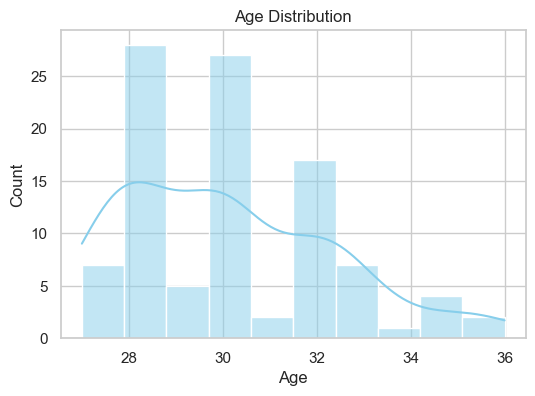

In [76]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()


The histogram shows the distribution of ages across all individuals in the dataset. The kernel density estimate (KDE) smooths the distribution to highlight the overall shape.


In [ ]:
# Season distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Season', data=df, palette='muted')
plt.title('Season of Analysis')
plt.show()

This count plot visualizes the frequency of data collection across different seasons, which may influence some fertility factors.


In [ ]:
# ---------------------------------
# 3. Numerical vs Categorical
# ---------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x='Diagnosis', y='Age', data=df, palette='Set3')
plt.title('Age by Diagnosis')
plt.show()

The boxplot compares age distributions across diagnosis categories. We can observe differences in median age and spread that may correlate with fertility outcomes.


In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='Diagnosis', 
    y='Number of hours spent sitting per day', 
    data=df, 
    palette='Set3',
    showfliers=False  # Hide outliers to avoid distraction
)
sns.swarmplot(
    x='Diagnosis', 
    y='Number of hours spent sitting per day', 
    data=df, 
    color='black', 
    size=3,
    alpha=0.6
)
plt.title('Sitting Hours by Diagnosis')
plt.ylabel('Hours Sitting per Day')
plt.xticks(rotation=0)
plt.tight_layout()
plt.ylim(0, 20)
plt.show()


This plot shows how sitting time varies between diagnosis groups. Prolonged sitting might be a risk factor or correlate with certain fertility outcomes.


In [80]:
# ---------------------------------
# 4. Categorical vs Categorical
# ---------------------------------
categorical_cols = [
    'Childish diseases',
    'Accident or serious trauma',
    'Surgical intervention',
    'High fevers in the last year',
    'Frequency of alcohol consumption',
    'Smoking habit'
]



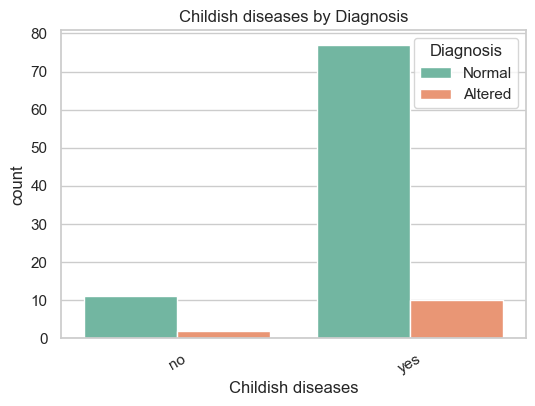

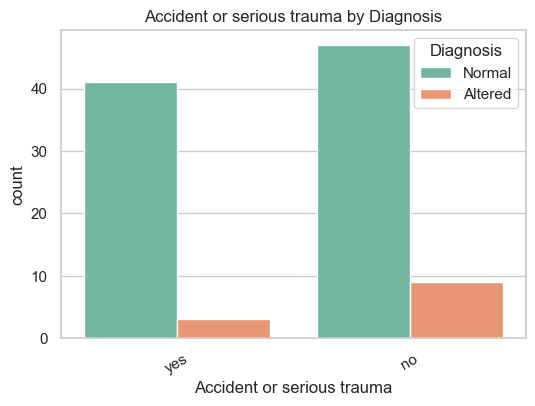

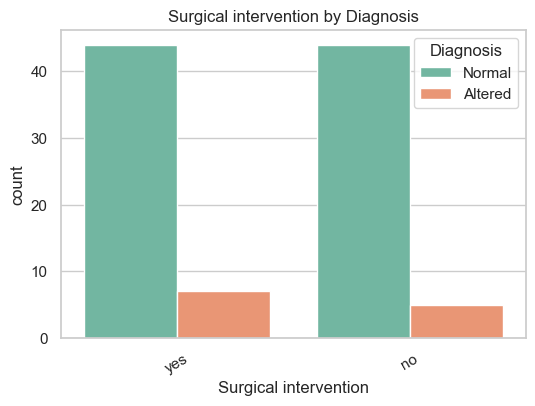

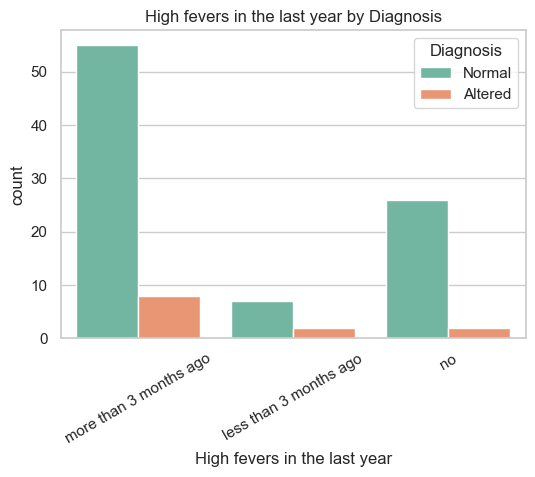

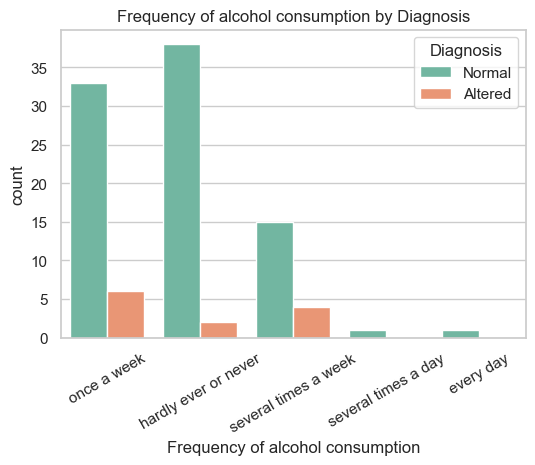

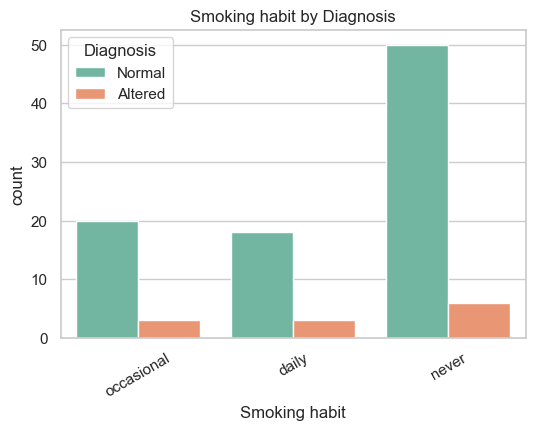

In [81]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Diagnosis', data=df, palette='Set2')
    plt.title(f'{col} by Diagnosis')
    plt.xticks(rotation=30)
    plt.show()

The series of countplots above compare different categorical health and lifestyle variables by diagnosis status, highlighting possible associations between these factors and fertility.


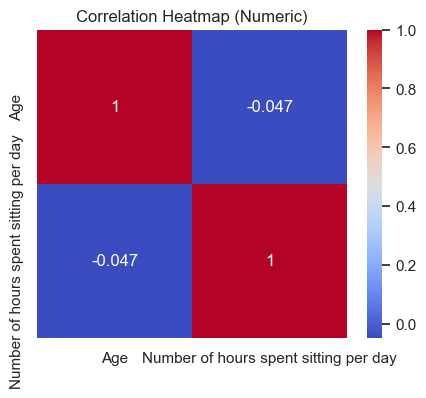

In [82]:
# ---------------------------------
# 5. Correlation Heatmap (Numerics only)
# ---------------------------------
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric)')
plt.show()

The heatmap displays correlation coefficients among numeric variables, helping to identify strong linear relationships that may be useful predictors.


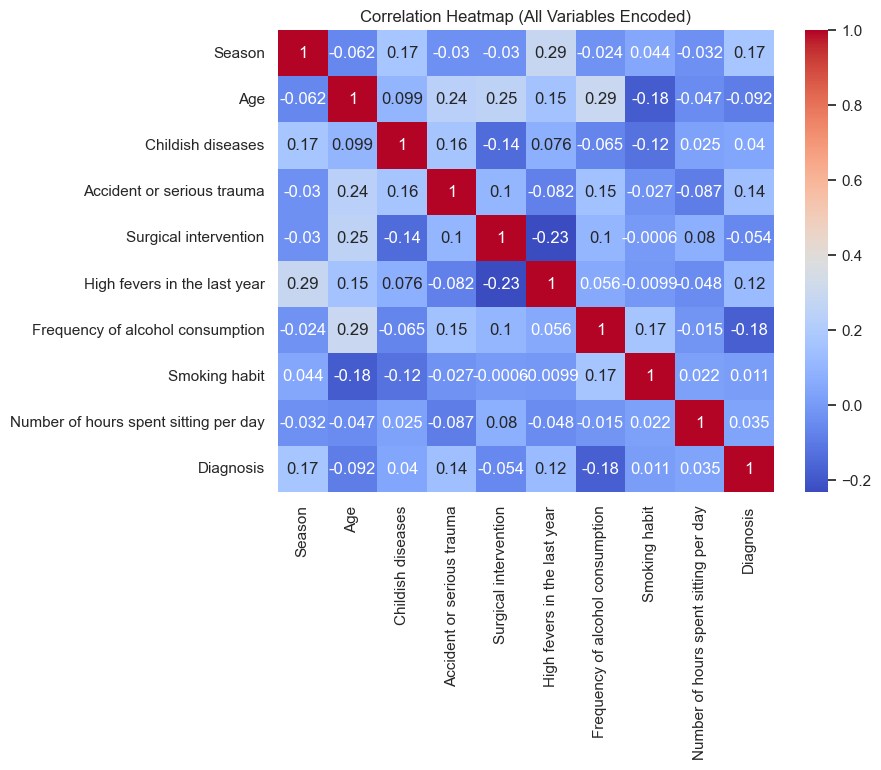

In [83]:
# ---------------------------------
# 6. Optional: Encode categories and redo heatmap
# ---------------------------------
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

corr_all = df_encoded.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_all, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (All Variables Encoded)')
plt.show()


After encoding categorical variables as numeric codes, this heatmap shows correlations including both numeric and formerly categorical data, which can reveal additional relationships.


This  set of data suggests that most individuals evaluated are adults on a median range of ages 28 to 32 years, with  altered cases commonly observed on the ages of 30 and 32 years.
Most the data collected was around spring, fall and Winter, which may reflect enviromental or clinical patterns relevant to fertility evaluations.

There was also a notable relationship between prolonged sitting and fertility outcomes, specifically showing that more that 6 hours of prolonged sitting per day could report an altered fertility diagnosis, which indicates that sedentarism may be a potential risk factor.

Aditionally, the data showed associations between the presence of  diseases as child, recent high fevers and frequent alcohol cosumption may correlate to an altered fertility diagnosis.

While these patterns suggests potential risk indicators,further analysis or predictive modeling would be required to confirm their significance.